In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pickle

# Step 2: Load the dataset
df = pd.read_csv("C:/Users/91798/OneDrive/Desktop/pythondataassets/CREDITCARD.csv")

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Missing Values:
 0

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


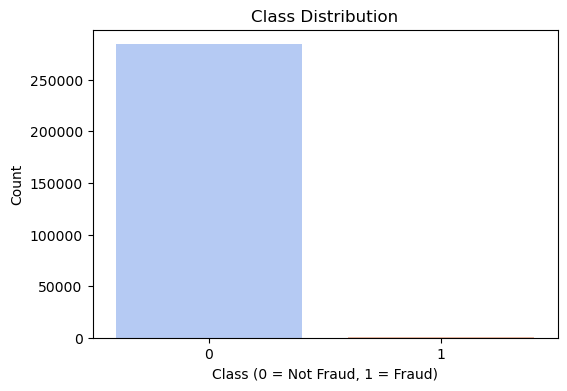


Dataset Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

In [2]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum().sum())

# Check class distribution
print("\nClass Distribution:\n", df['Class'].value_counts())

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Class'], palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Class (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Display basic statistics
print("\nDataset Statistics:\n", df.describe())


In [3]:
# Step 4.1: Separate features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Step 4.2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4.3: Apply Standard Scaling (important for ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4.4: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [4]:
# Step 5: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = rf_model.predict(X_test)



In [5]:
# Step 6: Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56852    12]
 [   17    81]]
ROC-AUC Score: 0.9131597912096746


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Results:")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log))



Logistic Regression Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
 [[55402  1462]
 [    8    90]]
ROC-AUC Score: 0.9463284399297142


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("\nDecision Tree Results:")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dt))



Decision Tree Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
 [[54426  2438]
 [    9    89]]
ROC-AUC Score: 0.9326445195410747


In [18]:
from sklearn.ensemble import IsolationForest

# Initialize and train the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train_resampled)

# Predict anomalies (-1 = Fraud, 1 = Normal)
y_pred_if = iso_forest.predict(X_test)
y_pred_if = [1 if x == -1 else 0 for x in y_pred_if]  # Convert -1 (Fraud) to 1 and 1 (Normal) to 0

# Evaluate the model
print("\nIsolation Forest Results:")
print("Classification Report:\n", classification_report(y_test, y_pred_if))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_if))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_if))



Isolation Forest Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.19      0.03      0.05        98

    accuracy                           1.00     56962
   macro avg       0.59      0.52      0.53     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56851    13]
 [   95     3]]
ROC-AUC Score: 0.5151918146268073


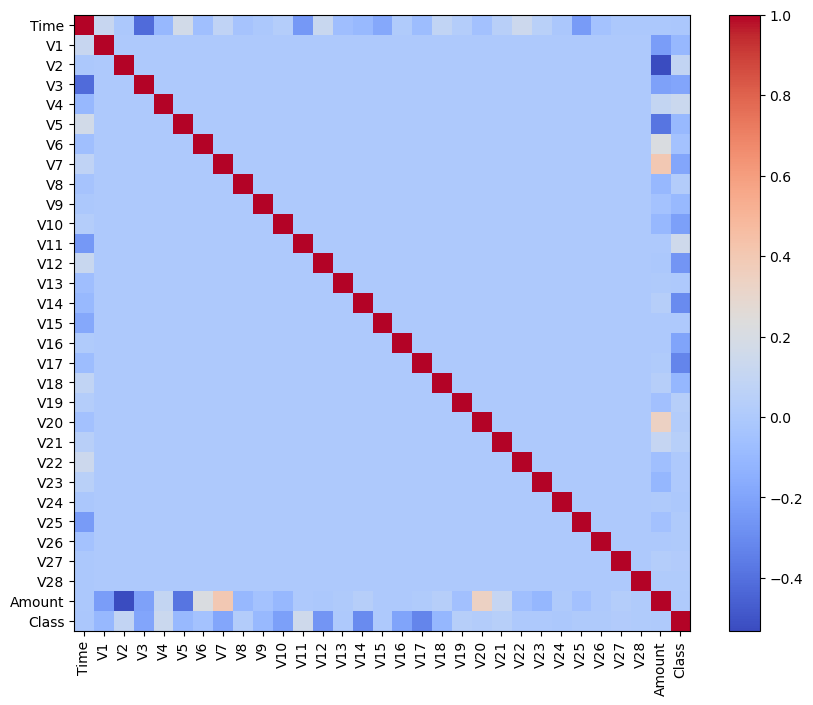

In [20]:
#Heat map:
#calculate the correlation matrix
correlation_matrix=df.corr()

#plot of the heat map
fig,a=plt.subplots(figsize=(10,8))
cax=a.matshow(correlation_matrix,cmap='coolwarm')
fig.colorbar(cax)

#set axis ticks and labels correctly
a.set_xticks(range(len(correlation_matrix.columns)))
a.set_yticks(range(len(correlation_matrix.columns)))
a.set_xticklabels(correlation_matrix.columns,rotation=90)
a.set_yticklabels(correlation_matrix.columns)


#Ensure ticks are in the correct order
a.xaxis.tick_bottom()
a.yaxis.tick_left()


plt.show()

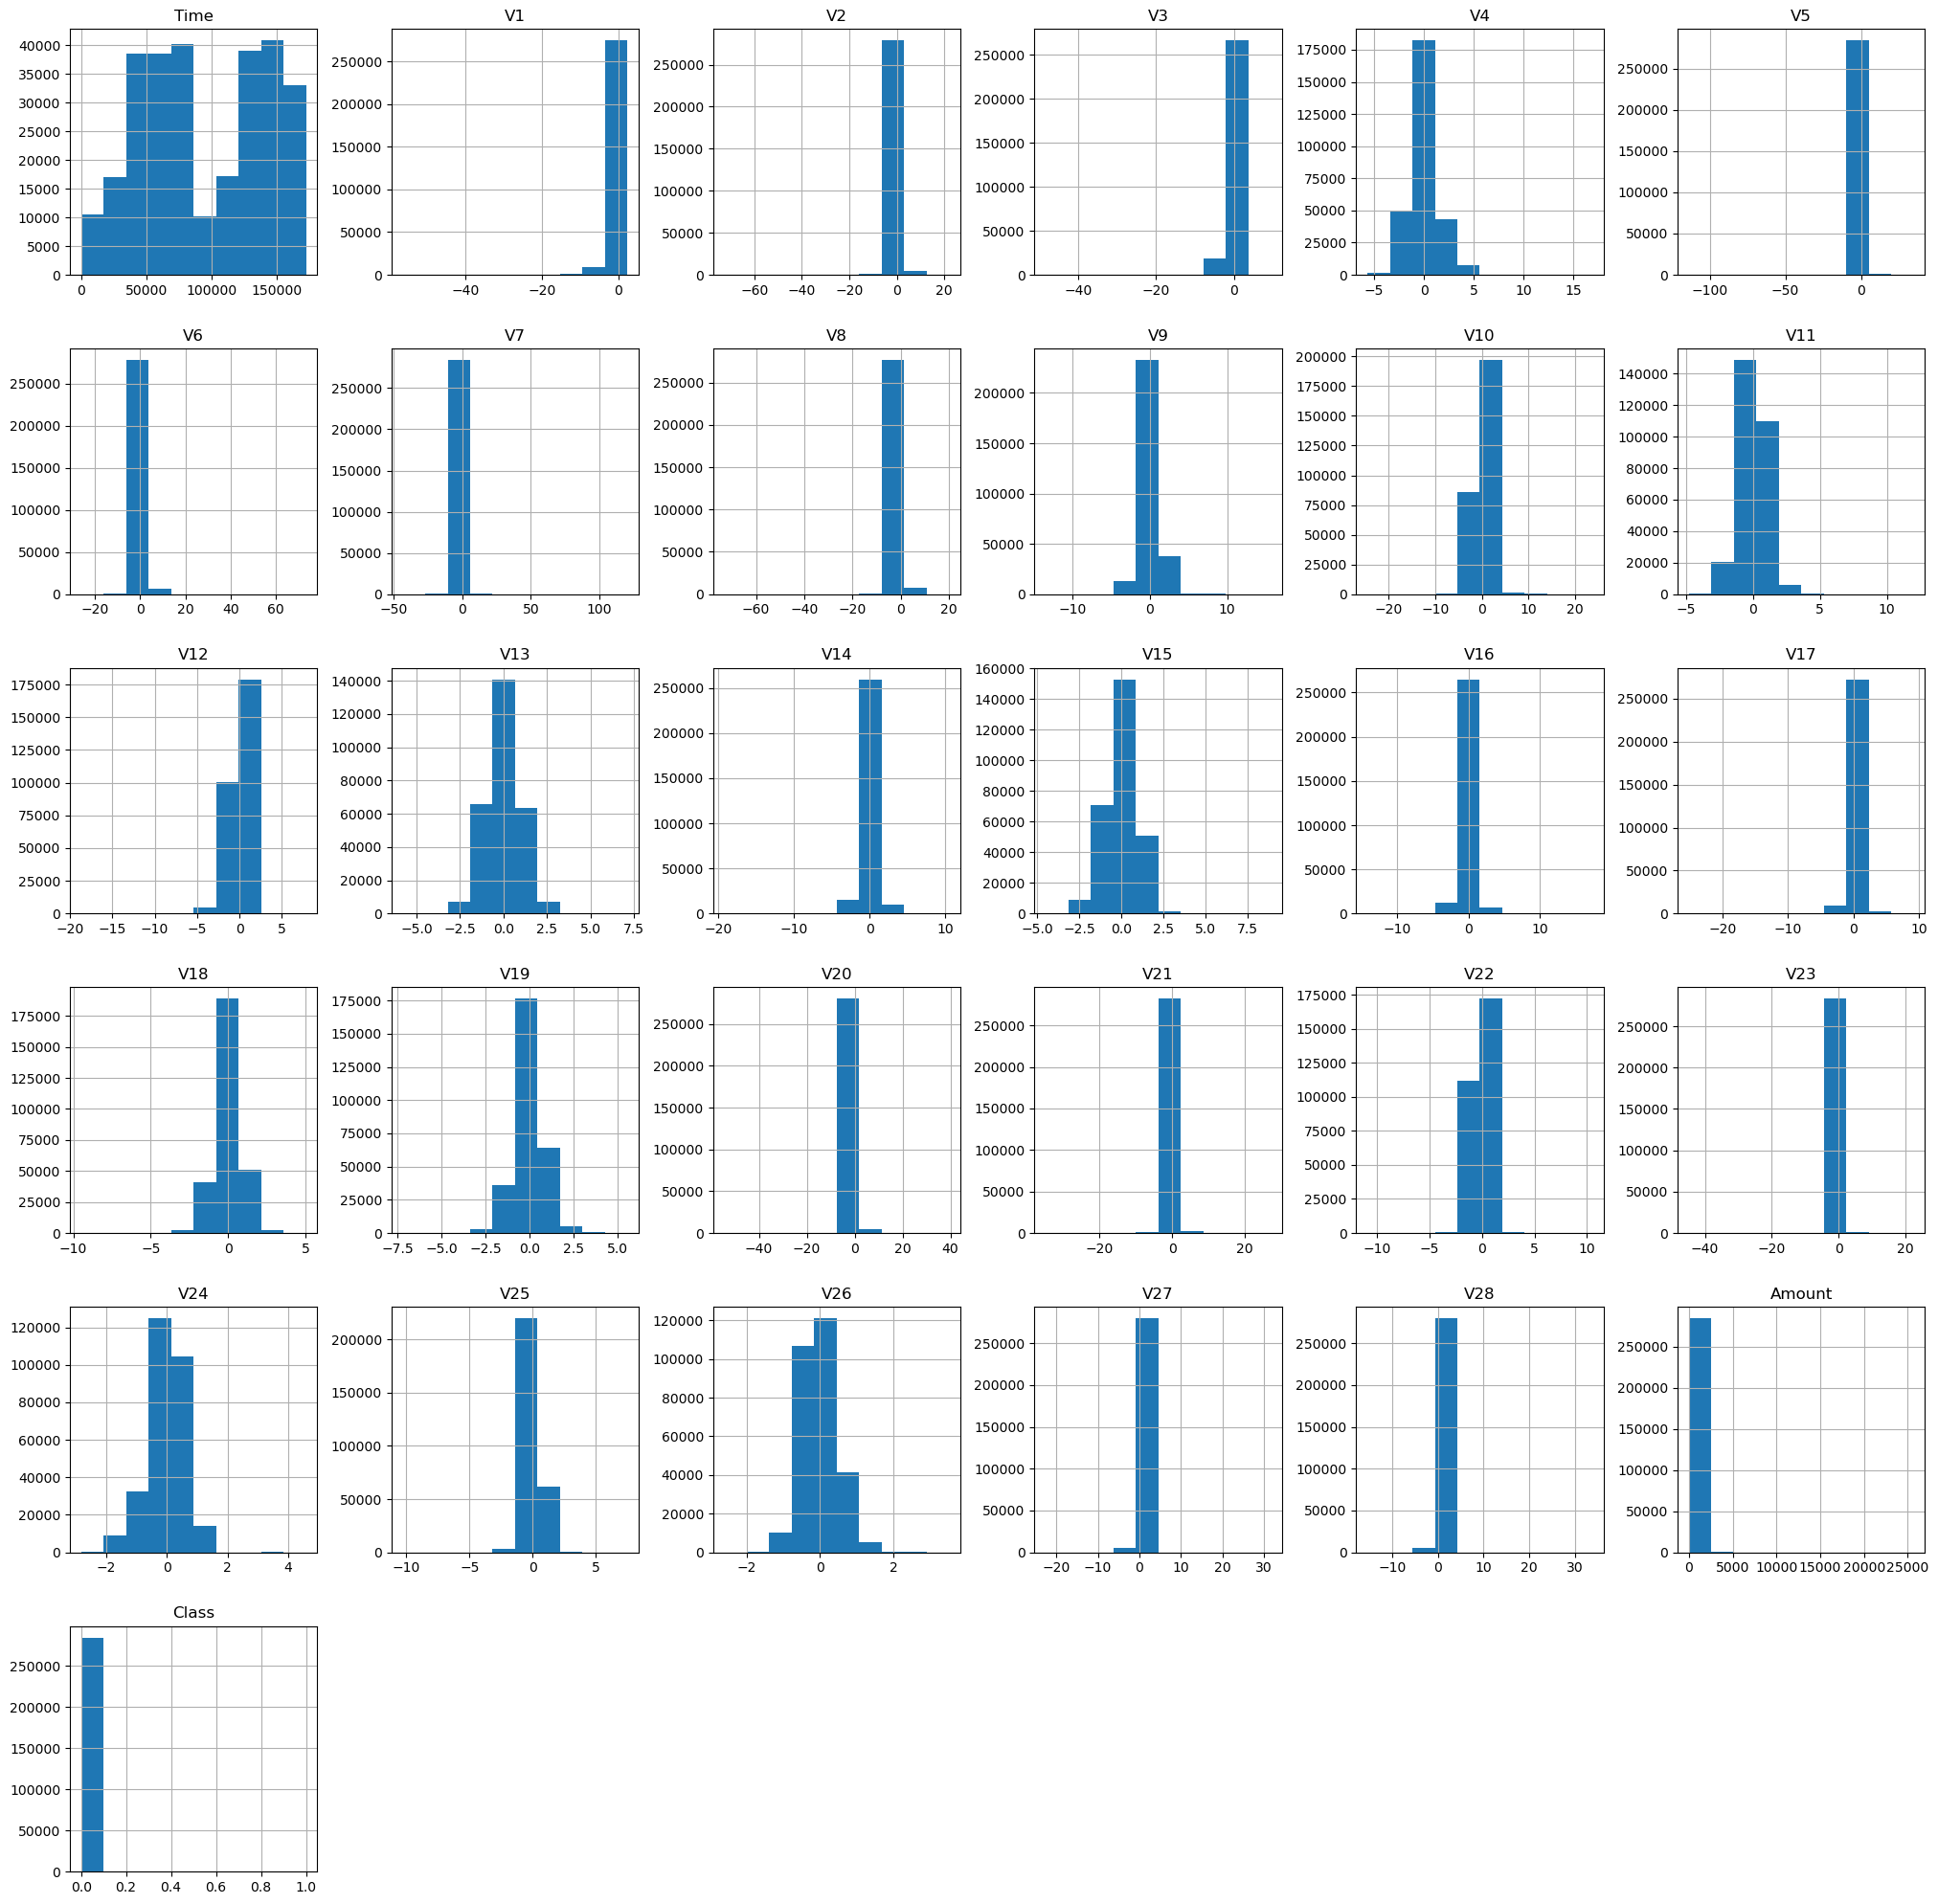

In [22]:
#histogrm:
#create histogram:
df.hist(bins=10, figsize=(25,25))
plt.title('Histogram of CREDITCARD.csv')
plt.xlabel('values ')
plt.ylabel('characteristics ')
plt.grid(True)
plt.show()

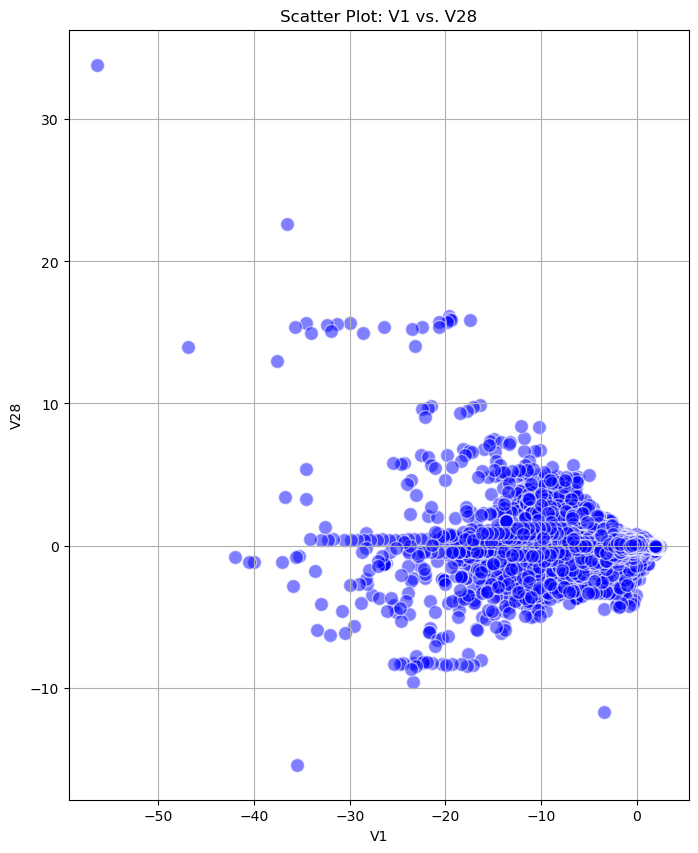

In [24]:
# Scatter plot: V1 vs. V28
plt.figure(figsize=(8, 10))
plt.scatter(df['V1'], df['V28'], alpha=0.5, c='blue', edgecolors='w', s=100)
plt.title('Scatter Plot: V1 vs. V28')
plt.xlabel('V1')
plt.ylabel('V28')
plt.grid(True)
plt.show()

In [28]:
import pickle
from sklearn.preprocessing import StandardScaler

# ✅ Ensure best model is assigned after hyperparameter tuning
try:
    best_rf_model = random_search.best_estimator_  # If tuning was done
except NameError:
    best_rf_model = rf_model  # If no tuning, use default model

# ✅ Save the trained model
with open("fraud_detection_model.pkl", "wb") as model_file:
    pickle.dump(best_rf_model, model_file)

# ✅ Ensure scaler is defined and fitted
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ✅ Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
